🧩 Idea

A portfolio has multiple assets with given expected returns and covariance matrix.

Generate correlated random returns using Cholesky decomposition.

Apply portfolio weights to get overall returns.

Compute Value at Risk (VaR): the cutoff return at a chosen confidence (e.g., 95%).

👉 Example:
At 95% confidence, 1-day VaR = “we don’t expect to lose more than X in one day, 95% of the time.”

In [1]:
# Monte Carlo Simulation for Portfolio Value at Risk (VaR)

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# Portfolio parameters
mu = np.array([0.0005, 0.0002])  # mean daily returns of assets
cov = np.array([[0.0004, 0.0001],
                [0.0001, 0.0003]])  # covariance matrix
weights = np.array([0.6, 0.4])   # portfolio weights

N = 200_000   # number of simulations
alpha = 0.95  # confidence level

In [3]:
# Generate correlated random returns
L = np.linalg.cholesky(cov)
Z = np.random.normal(size=(2, N))
correlated = (L @ Z).T
returns = mu + correlated   # simulated returns for 2 assets


In [4]:
# Portfolio returns
portfolio_returns = returns @ weights


In [5]:
# Compute Value at Risk
var_cutoff = np.quantile(portfolio_returns, 1 - alpha)
VaR = -var_cutoff  # express as a positive loss

In [6]:

print(f"Mean return: {np.mean(portfolio_returns):.5f}")
print(f"Std dev   : {np.std(portfolio_returns, ddof=1):.5f}")
print(f"VaR {int(alpha*100)}%: {VaR:.5f}")

Mean return: 0.00036
Std dev   : 0.01549
VaR 95%: 0.02516


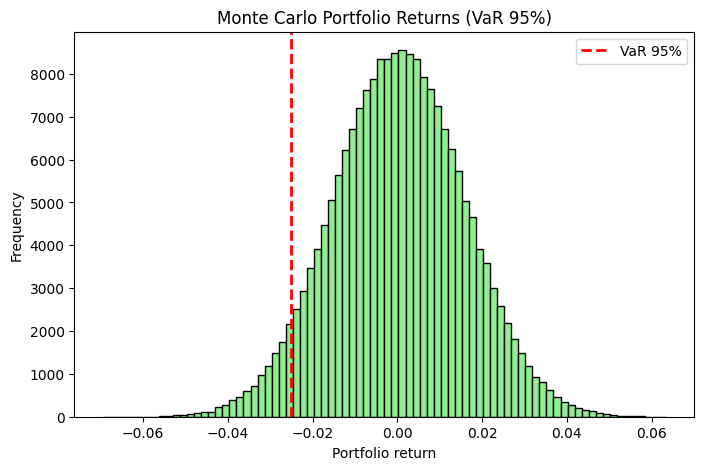

In [7]:
# Visualize portfolio return distribution with VaR marker
plt.figure(figsize=(8,5))
plt.hist(portfolio_returns, bins=80, color="lightgreen", edgecolor="black")
plt.axvline(var_cutoff, color="red", linestyle="--", linewidth=2, label=f"VaR {int(alpha*100)}%")
plt.title(f"Monte Carlo Portfolio Returns (VaR {int(alpha*100)}%)")
plt.xlabel("Portfolio return")
plt.ylabel("Frequency")
plt.legend()
plt.show()


📌 Conclusion

The distribution of returns shows uncertainty in portfolio outcomes.

VaR gives a risk threshold: at 95%, the portfolio won’t lose more than VaR (as % of value) on most days.

Monte Carlo allows flexible modeling:

More assets

Non-normal returns

Stress testing by changing covariance